# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Feb 4, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Ningcan Sun *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1003270435

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [2]:
# import packages
import pandas as pd
import numpy as np

In [3]:
# the df only include features
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# get the target 
target=dataset.target
# add the target into the df, the df include the features and the target variable
df['Malignant_or_Benign'] = target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Malignant_or_Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# The number of feature
# The reason I minus 1 because it include one target.
print('The number of feature is ',df.shape[1]-1)

The number of feature is  30


In [6]:
# How many observations have a 'mean area' of greater than 700? 
print('the numeber of observations have a mean area  greater than 700 is',df[df['mean area'] >700].shape[0])

the numeber of observations have a mean area  greater than 700 is 171


In [7]:
#How many participants tested Malignant? 
print('the number of participant tested Malignant is ',df[df['Malignant_or_Benign']==0].shape[0])

the number of participant tested Malignant is  212


In [8]:
#How many participants tested Benign? 
print('the number of participant tested Benign is ',df[df['Malignant_or_Benign']==1].shape[0])

the number of participant tested Benign is  357


###### Summarize:
<font color ='Blue'> The number of feature is 30
    
<font color ='Blue'>    the numeber of observations have a mean area  greater than 700 is 171
    
<font color ='Blue'>    the number of participant tested Malignant is  212
    
<font color ='Blue'>    the number of participant tested Benign is  357

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(['Malignant_or_Benign'],axis = 1).copy()
y = df['Malignant_or_Benign'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




In [10]:
# Find the variable 'worst smoothness' and 'worst fractal dimension' under training set 
Worst_smoothness_df=pd.DataFrame(X_train['worst smoothness'])
Worst_fractal_dimension=pd.DataFrame(X_train['worst fractal dimension'])

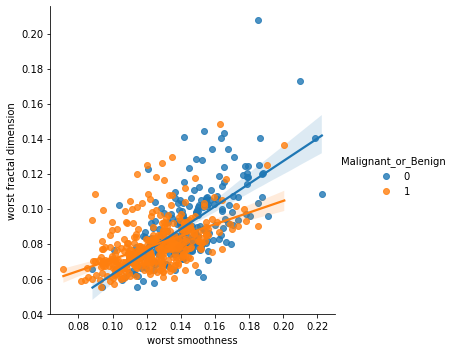

In [11]:
# Draw a plot where the x-axis is worst smoothness, the y-axis is worst fractal dimension,
import seaborn as sns
graph = sns.lmplot(x='worst smoothness',y= 'worst fractal dimension', data=df, hue="Malignant_or_Benign")

In [12]:
#standardizing the data - variable worst smooth
worst_smoothness=X_train['worst smoothness']

# get the mean for worst smoothness
worst_smoothness_mean = X_train['worst smoothness'].mean()

#get the standard deviation for worst smoothness
worst_smoothness_std = X_train['worst smoothness'].std()

#apply the Standardlizing
worst_smoothness -= worst_smoothness_mean
worst_smoothness /= worst_smoothness_std
worst_smoothness

478    0.116182
303    0.381521
155   -0.471044
186   -0.397097
101    1.125341
         ...   
277   -0.357949
9      2.295444
359    0.033535
192   -2.669011
559   -0.118709
Name: worst smoothness, Length: 398, dtype: float64

In [13]:
#standardizing the data - variable worst fractal dimension
worst_fractal_dimension=X_train['worst fractal dimension']

# get the mean for worst fractal dimension
worst_fractal_dimension_mean = X_train['worst fractal dimension'].mean()

#get the standard deviation for worst fractal dimension
worst_fractal_dimension_std = X_train['worst fractal dimension'].std()

#apply the Standardlizing
worst_fractal_dimension -= worst_fractal_dimension_mean
worst_fractal_dimension /= worst_fractal_dimension_std
worst_fractal_dimension

478    0.450062
303   -0.295042
155   -0.133547
186   -0.798461
101    0.562552
         ...   
277   -1.467273
9      6.893154
359   -0.131320
192   -1.009518
559    0.200580
Name: worst fractal dimension, Length: 398, dtype: float64

In [14]:
# Change the index, so that we can easily to contact the df
worst_smoothness=worst_smoothness.reset_index().iloc[:,1]
worst_fractal_dimension=worst_fractal_dimension.reset_index().iloc[:,1]
y_train=y_train.reset_index().iloc[:,1]

In [15]:
# create a temporary df as temp1 which  include the two variables after standardlization, and one target
temp1=pd.concat([worst_smoothness, worst_fractal_dimension,y_train.reset_index().iloc[:,1]], axis=1)
temp1

,worst smoothness,worst fractal dimension,Malignant_or_Benign
0,0.116182,0.450062,1
1,0.381521,-0.295042,1
2,-0.471044,-0.133547,1
3,-0.397097,-0.798461,0
4,1.125341,0.562552,1
...,...,...,...
393,-0.357949,-1.467273,0
394,2.295444,6.893154,0
395,0.033535,-0.131320,1
396,-2.669011,-1.009518,1


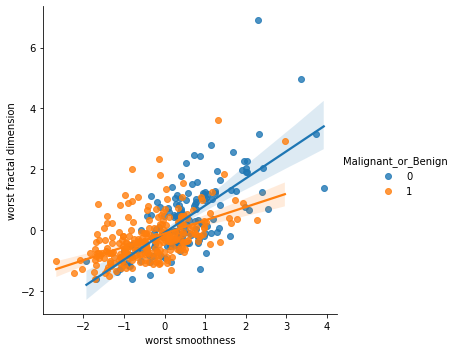

In [16]:
import seaborn as sns
graph = sns.lmplot(x='worst smoothness',y= 'worst fractal dimension', data=temp1, hue="Malignant_or_Benign")

##### What's different? Based on your observation, what is the advantage of standardization?

 <font color = 'Blue'>Difference of the standardlization : Fitst,  it can change the data's mean become 0 and the variance become 1,  and it does not change the distributions. Secondly, the another difference is it can also make the data have the same scale with the models.
    
 <font color = 'Blue'> Advantage: The advantage is the feature engineening is really benefit for the Machine Learning. As we know the ML model is distance-based, so when the data have a large difference on the features, it can let the difference decrease and benefit for the models.


## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




In [17]:
from sklearn import neighbors
from sklearn.model_selection import cross_validate

In [18]:
# 1. Sweep k (number of neighbours) from 1 to 100
validation_score=[]
train_score=[]
for i in range(1,101):
    # Train a KNN Classifier 
    model=neighbors.KNeighborsClassifier(n_neighbors=i)
    # using cross-validation on the dataset.
    scores = cross_validate (model, X_train, y_train, cv=5, return_train_score=True)
    validation_score.append(scores['test_score'].mean())
    train_score.append(scores['train_score'].mean())
# get the validation df
validation=pd.DataFrame(validation_score)
validation.index += 1 
validation
print('the max validation score is',max(validation_score))

the max validation score is 0.9346518987341772


Text(0.5, 1.0, 'Mean cross-validation accuracy VS k')

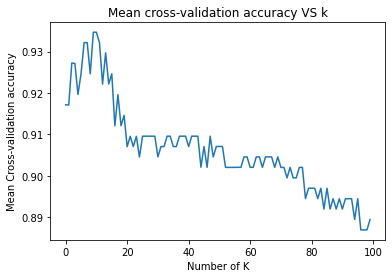

In [19]:
# show a plot of the mean cross-validation accuracy vs k
import matplotlib.pyplot as plt

plt.plot(validation_score)
plt.xlabel('Number of K')
plt.ylabel('Mean Cross-validation accuracy')
plt.title('Mean cross-validation accuracy VS k')

In [20]:
# 2. What is the best k? What is the highest cross-validation accuracy?
validation=pd.DataFrame(validation_score)
validation.index += 1 
validation.columns = ['scores']
best_k=list(validation[validation.scores==0.9346518987341772].index)
print('The best K is ',best_k, 'and the best accuracy is ',max(validation_score))

The best K is  [10, 11] and the best accuracy is  0.9346518987341772


Text(0.5, 1.0, 'Mean cross-validation accuracy VS k')

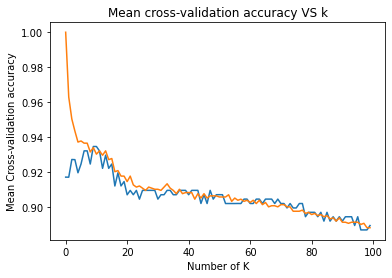

In [21]:
#Comment on which ranges of k lead to underfitted or overfitted models 
plt.plot(validation_score)
plt.plot(train_score)
plt.xlabel('Number of K')
plt.ylabel('Mean Cross-validation accuracy')
plt.title('Mean cross-validation accuracy VS k')


##### Summarize

<font color = 'Blue'> the highest cross-validation accuracy is 0.9346518987341772, The best K is  10

 #### 3. Comment on which ranges of k lead to underfitted or overfitted models
 
 <font color = 'Blue'> The Yellow line is the training curve and the blue line is the velidation curve. The overfitting part is when k from 0 to 10, at that time, the yellow line (training curve) is very different from the validation curve, which means the model can only predict training data clearly, but for the validation data, it can not predict correctly.

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [22]:
X_train_temp=X_train.copy()
X_train_temp.shape
my_best_acc=0.9346518987341772

In [23]:
X_train_temp.shape

(398, 30)

In [24]:
# Set a KNN define function
def knn_k(X_train, y_train):
    validation_score=[]
    train_score=[]
    for i in range(1,101):
        model=neighbors.KNeighborsClassifier(n_neighbors=i)
        scores = cross_validate (model, X_train, y_train, cv=5, return_train_score=True)
        validation_score.append(scores['test_score'].mean())
        acc=max(validation_score)
    return acc, validation_score.index(acc)+1

# 1. Fits a decision tree classifier on the training set.
from sklearn import tree
def Feature_selector (X_train, y_train, tr=0.95):
    feature_remove=[]
    k=[]
    mean_acc=[]
    
    # extract all the features into a dataframe
    #X_column_name=pd.DataFrame(df[df.columns[range(30)]].columns) 
    array_feature=np.array(X_train.columns)
    
    # 6. Go back to step 3 and follow all the steps until you meet the stop condition
    # 7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly 
    while 0.9346518987341772 > tr*my_best_acc and  X_train.shape[1] > 1:

        dt = tree.DecisionTreeClassifier()
        dt.fit(X_train,y_train)
        # 2. Extracts the feature importance order of the decision tree model.
        importance = dt.feature_importances_
        # get the full df with the order of importance of the feature and the column name
        # get the min importance score
        min_importance_score=int(min(importance))
        # get the first index of the min importance score
        # Drop the feature in min_importance_index, drop it though index
        importance=np.delete(importance, np.argmin(importance))
        # Find the feature we would like to delet, feature_delete is the feature name 
        feature_delete=array_feature[np.argmin(importance)]
        # delete the feature in the arrary_feature 
        # 3. Removes the least important feature based on step 2.
        array_feature=np.delete(array_feature, np.argmin(importance))
        # delete the feature columns in the df, X_train
        X_train=X_train.drop(columns=[feature_delete])
        
        # imply the model
        #knn_k(X_train, y_train)
        #X_train = X_train.copy()
        
        # 4. Then, a KNN model is trained on the remaining features. 
        score,k_value = knn_k(X_train,y_train)
        # 5. Store the best mean cross-validation score and the corresponding k
        mean_acc.append(score)
        k.append(k_value) 
        #### put into delete feature, append in to list
        # 8. Your function returns the list of removed features, 
        feature_remove.append(feature_delete)

    return feature_remove, mean_acc, k
    

In [25]:
feature_removed,accuracy,best_k=Feature_selector (X_train_temp, y_train, tr=0.95)

In [26]:
# reverse the accuracy 
accuracy.reverse()

In [27]:
# reverse the accuracy 
accuracy

[0.7062658227848101,
 0.7062658227848101,
 0.9548417721518987,
 0.9548417721518987,
 0.9548101265822785,
 0.9548101265822785,
 0.9548101265822785,
 0.9548101265822785,
 0.9548101265822785,
 0.9548101265822785,
 0.9473101265822784,
 0.9397151898734177,
 0.9447151898734176,
 0.9447151898734176,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9321518987341773,
 0.9321518987341773,
 0.9346518987341772]

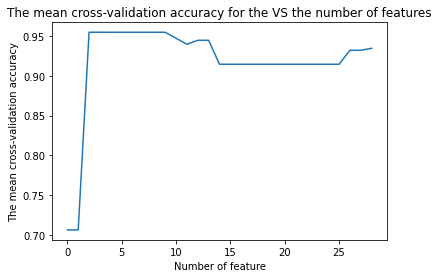

In [28]:
import matplotlib.pyplot as plt
# plotting the mean cross-validation accuracy (with a tuned k on y axis) vs. the on the number of features (x axis). 
plt.plot( accuracy)
plt.title('The mean cross-validation accuracy for the VS the number of features')
plt.xlabel('Number of feature')
plt.ylabel('The mean cross-validation accuracy')
plt.show()

In [29]:
# reverse the best_k
best_k.reverse()

In [30]:
# reverse the best_k
best_k

[31,
 31,
 11,
 11,
 8,
 8,
 5,
 5,
 5,
 5,
 4,
 6,
 3,
 3,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 7,
 7,
 10]

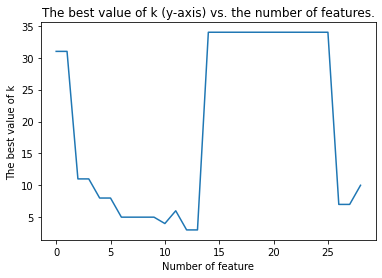

In [31]:
# Plot the best value of k (y-axis) vs. the number of features.
plt.plot(best_k)
plt.title('The best value of k (y-axis) vs. the number of features.')
plt.xlabel('Number of feature')
plt.ylabel('The best value of k')
plt.show()

##### State what is the number of essential features for classification and justify your answer.

<font color = 'Blue'> For my graph, as we can see the accuracy shows that it is the highest when there are 10 features. The highest accuracy is 0.9346518987341772, which is 9 feature

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [32]:
# 1. Standardize the training and test data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train) 

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
X_train_scaled=pd.DataFrame(X_train_scaled)
X_train_scaled.columns=X_train.columns
X_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,-0.099860,0.451444,-0.700612,-0.069762,-0.616731,-0.543408,-0.709153,-0.235489,0.362090,-0.621777,-0.241390,-0.045963,-0.798483,-0.591967,-0.746602,-0.714529,0.116328,-0.341255,-0.046272,-0.623597,0.077542,0.450628
1,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,-1.159759,0.489386,-0.887604,0.650381,-0.869191,-0.629005,0.661884,-0.936002,-0.460600,-0.423483,-0.305031,-0.158707,-1.068703,-0.161981,-1.074343,-0.868941,0.382001,-0.970737,-0.954894,-0.761238,-1.071453,-0.295414
2,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,0.581758,-0.053477,-0.644071,-0.402987,-0.656119,-0.499806,-0.512840,-0.563799,-0.395430,-0.641247,-0.295240,-0.474919,-0.558512,-0.051227,-0.614110,-0.552748,-0.471637,-0.485919,-0.384602,-0.504704,0.349008,-0.133716
3,1.147577,-0.146430,1.061698,1.035628,-0.762301,-0.380637,-0.091016,0.221141,-0.663712,-1.225303,-0.515663,-1.321940,-0.498094,-0.250449,-1.440862,-0.946767,-0.599350,-0.847056,-1.188652,-1.005230,0.998276,0.134448,0.914190,0.863760,-0.397597,-0.057793,0.441794,0.638339,0.495789,-0.799466
4,-2.004538,-1.376954,-1.962370,-1.415904,1.476766,-0.557221,-1.137578,-1.263267,0.439011,2.266825,-0.630106,0.550613,-0.623375,-0.633968,1.122045,-0.848096,-1.094086,-1.994631,0.757273,0.138526,-1.699888,-0.976348,-1.665615,-1.187480,1.126757,-0.867778,-1.391304,-1.756275,0.063338,0.563260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.286694,0.188082,1.154672,1.202251,-0.521270,-0.887630,-0.110105,0.228545,-0.917089,-1.851347,-0.275196,-0.682881,-0.238991,-0.093320,0.205571,-0.830253,-0.175041,0.504107,-0.134915,-0.781642,0.726040,-0.201071,0.617827,0.572352,-0.358400,-0.895147,-0.246265,0.216119,-0.512738,-1.469120
394,-0.480093,1.158165,-0.338161,-0.507950,1.591885,2.658965,1.774450,0.917898,0.795879,2.887031,-0.379762,0.715684,-0.392745,-0.350513,0.057900,2.799591,1.618900,0.451161,-0.307478,2.408576,-0.256027,2.466795,-0.293051,-0.306224,2.298333,5.243276,4.333890,1.612342,2.326606,6.901830
395,-1.321473,-0.208553,-1.314385,-1.046877,0.318380,-0.873503,-0.790390,-0.904293,-1.074111,1.013278,0.336531,0.077169,0.190000,-0.219104,-0.051629,-0.958603,-0.271396,-0.873359,-0.120229,-0.387989,-0.875113,-0.083802,-0.928196,-0.761422,0.033577,-0.967479,-0.798578,-0.986219,-0.691085,-0.131485
396,-1.242455,-0.232447,-1.277599,-1.020928,-1.940832,-1.582194,-1.137578,-1.263267,-0.549515,0.266111,-0.188001,6.676362,-0.302106,-0.395723,-1.844334,-1.092187,-1.094086,-1.994631,2.152465,-0.777086,-1.288912,-0.766242,-1.321603,-0.988854,-2.672370,-1.473214,-1.391304,-1.756275,-1.551253,-1.010789


In [34]:
# 2. Call your Feature_selector function on the standardized training data with a threshold of 95%.
feature_removed_scaled,accuracy_scaled,best_k_scaled= Feature_selector(X_train_scaled , y_train , 0.95)

In [35]:
feature_removed_scaled.reverse()

In [36]:
best_k_scaled.reverse()

In [37]:
# reverse the accuracy 
accuracy_scaled.reverse()

In [38]:
best_k_scaled

[31,
 35,
 4,
 6,
 3,
 5,
 3,
 5,
 8,
 14,
 16,
 16,
 12,
 4,
 10,
 8,
 10,
 8,
 8,
 3,
 4,
 8,
 8,
 6,
 8,
 14,
 4,
 4,
 4]

In [39]:
feature_removed_scaled

['worst texture',
 'worst perimeter',
 'worst radius',
 'worst compactness',
 'worst concavity',
 'worst symmetry',
 'perimeter error',
 'fractal dimension error',
 'mean fractal dimension',
 'worst concave points',
 'worst area',
 'worst smoothness',
 'symmetry error',
 'concave points error',
 'compactness error',
 'concavity error',
 'smoothness error',
 'area error',
 'texture error',
 'radius error',
 'mean compactness',
 'mean concave points',
 'mean symmetry',
 'mean smoothness',
 'mean area',
 'mean perimeter',
 'mean concavity',
 'mean radius',
 'mean texture']

In [40]:
accuracy_scaled

[0.7062658227848101,
 0.7665189873417722,
 0.9572468354430379,
 0.9573417721518988,
 0.9623101265822784,
 0.9623734177215189,
 0.967373417721519,
 0.9623417721518986,
 0.9623417721518986,
 0.9573101265822785,
 0.9623417721518986,
 0.9648734177215189,
 0.9649050632911391,
 0.9674683544303797,
 0.9648734177215189,
 0.9674050632911392,
 0.9623417721518986,
 0.9623734177215189,
 0.9623734177215189,
 0.9573417721518988,
 0.957373417721519,
 0.9548101265822785,
 0.9573101265822785,
 0.9547468354430381,
 0.9548101265822785,
 0.9573417721518988,
 0.9648734177215189,
 0.9623417721518986,
 0.9623734177215189]

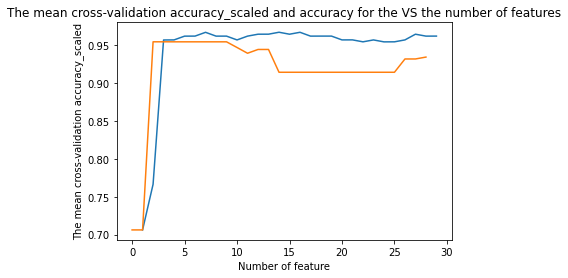

In [41]:
import matplotlib.pyplot as plt
# Plot the Cross validation accuracy 
plt.plot(range(1,30), accuracy_scaled, accuracy)
plt.title('The mean cross-validation accuracy_scaled and accuracy for the VS the number of features')

plt.xlabel('Number of feature')
plt.ylabel('The mean cross-validation accuracy_scaled')

plt.show()

In [42]:
# the max accuracy
print('The max accuracy under standardlization is',max(accuracy_scaled))
print (' the best k under standardlization is',best_k_scaled[np.argmax(accuracy_scaled)])

print('The feature are',['worst area',
 'worst concavity',
 'area error',
 'worst symmetry',
 'mean symmetry',
 'radius error',
 'worst fractal dimension',
 'worst texture',
 'fractal dimension error',
 'worst compactness',
 'worst radius',
 'worst smoothness',
 'worst perimeter',
 'symmetry error',
 'concave points error',
 'smoothness error',
 'concavity error',
 'compactness error'])

The max accuracy under standardlization is 0.9674683544303797
 the best k under standardlization is 4
The feature are ['worst area', 'worst concavity', 'area error', 'worst symmetry', 'mean symmetry', 'radius error', 'worst fractal dimension', 'worst texture', 'fractal dimension error', 'worst compactness', 'worst radius', 'worst smoothness', 'worst perimeter', 'symmetry error', 'concave points error', 'smoothness error', 'concavity error', 'compactness error']


##### Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)

<font color = 'Blue'> As we can see the graph which i draw it, the yellow line is the mean cross validation accurancy for the original data and the blue line is the mean cross validation accuracy for the standard data. It is really easy to see that the blue line (standard data) have much higher accuracy than the yellow line (original data). So the standardization helped my model become better performance.
    
<font color = 'Blue'> In my graph, the high cross validation accuracy is  0.9674050632911392, the best k is 6. The feature are ['worst area', 'worst concavity', 'area error', 'worst symmetry', 'mean symmetry', 'radius error', 'worst fractal dimension', 'worst texture', 'fractal dimension error', 'worst compactness', 'worst radius', 'worst smoothness', 'worst perimeter', 'symmetry error', 'concave points error', 'smoothness error', 'concavity error', 'compactness error']

## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [43]:
# use the MIE1624 Grid Search knowledge to write

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
cvv_final=[]
model = DecisionTreeClassifier(random_state = 0)
max_depth = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
grid = dict(max_depth=max_depth,min_samples_split=min_samples_split)

cvv = cross_validate (model,X_train_scaled, y_train, cv=5, return_train_score=True)['test_score'].mean()
cvv_final.append(cvv)
k=cvv_final.index(max(cvv_final))+1

grid = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy')
result = grid.fit(X_train_scaled, y_train)
print("Best model prediction percentage: %f using %s" % (result.best_score_, result.best_params_))

Best model prediction percentage: 0.932152 using {'max_depth': 5, 'min_samples_split': 8}


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [44]:
from sklearn.metrics import accuracy_score
knn_test = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_test.fit(X_train, y_train)
accuracy_final = accuracy_score(y_test, knn_test.predict(X_test))*100
print ("Test Data's Accuracy is: ", accuracy_final)

Test Data's Accuracy is:  95.32163742690058


In [45]:
from sklearn.metrics import accuracy_score
knn_test = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_test.fit(X_train_scaled, y_train)
accuracy_final = accuracy_score(y_test, knn_test.predict(X_test_scaled))*100
print ("Test Data's Accuracy is: ", accuracy_final)

Test Data's Accuracy is:  95.32163742690058


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


##### Disscuss your result:

<font color = 'Blue'>My best cv is when the n_neighbors=10, and use the KNN. My test data accuracy is 95.90643274853801 after the data Standardization, and when we use the original data, we noticed that the accuracy is 95.32163742690058. So we can say that the data Standardization is really important, and it can increase the test data accuracy.


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/

In [47]:
%%shell
jupyter nbconvert --to html /content/W22_APS1070_Project_1.ipynb


[NbConvertApp] Converting notebook /content/W22_APS1070_Project_1.ipynb to html
[NbConvertApp] Writing 583847 bytes to /content/W22_APS1070_Project_1.html
